Credits: https://github.com/Holmes-Alan/ImageNet_sample/tree/main

In [7]:
import torch
import torchvision

In [8]:
import torch
from torchvision import models
model = models.alexnet(pretrained=True)
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

The best prediction:

'./cats.jpg': 26.309051513671875% is a 'tiger cat'

Top 5 prediction:

26.309051513671875% is a 'tiger cat'
13.07383918762207% is a 'tabby, tabby cat'
12.566240310668945% is a 'German shepherd, German shepherd dog, German police dog, alsatian'
12.481059074401855% is a 'Egyptian cat'
8.625595092773438% is a 'tiger, Panthera tigris'


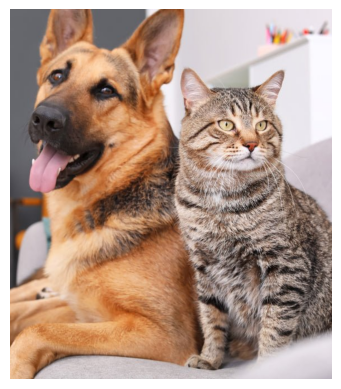

In [9]:
# sample execution (requires torchvision)
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

filename = './cats.jpg'

input_image = Image.open(filename)
plt.imshow(input_image)
plt.axis('off')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

# normalize the output as probability
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

# Load Imagenet Synsets
with open('./imagenet_synsets.txt', 'r') as f:
    synsets = f.readlines()

# len(synsets)==1001
# sysnets[0] == background
synsets = [x.strip() for x in synsets]
splits = [line.split(' ') for line in synsets]
key_to_classname = {spl[0]:' '.join(spl[1:]) for spl in splits}

with open('./imagenet_classes.txt', 'r') as f:
    class_id_to_key = f.readlines()

class_id_to_key = [x.strip() for x in class_id_to_key]

print('The best prediction:\n')
_, index = torch.max(output, 1)
classname = key_to_classname[class_id_to_key[index[0]]]
probability = percentage[index[0]].item()
print("'{}': {}% is a '{}'".format(filename, probability, classname))

print('\nTop 5 prediction:\n')
_, indices = torch.sort(output, descending=True)
for idx in indices[0][:5]:
    print("{}% is a '{}'".format(percentage[idx].item(), key_to_classname[class_id_to_key[idx]]))

Create classification reports for each image (like above)

Read imagenet_classes.txt file, and report how many classes are for classification.

Read the code, and report what is the input image size and how many layers of operations in AlexNet